# Sağlık Harcamalarını Neler Etkiliyor?
## İçindekiler
### 1.Giriş
### 2.Veriye Genel Bakış
### 3.Veri Temizliği
### 4.Keşifsel Veri Analizi ve Özellik Mühendisliği
 #### 4.1 Tek Değişkenli Analiz
 #### 4.2 Çok Değişkenli Analiz ve Özellik Mühendisliği
   ##### 4.2.a masraflar ile cinsiyet ilişkisi  
   ##### 4.2.b masraflar ile sigara kullanımı ilişkisi  
   ##### 4.2.c masraflar ile bölge ilişkisi  
    
### 5.Sonuç

### 1.Giriş  
Bu projemizde Birleşik Devletler'de sigorta kapsamında faturalandırılan bireysel sağlık harcamalarının, çeşitli kişisel bilgilerle sunulduğu bir veri kümesi ile çalışacağız. Veri kümesine [buradan ulaşabilirsiniz.](https://www.kaggle.com/mirichoi0218/insurance)  
Verimizi tanımaya geçmeden ihtiyacımız olacak kütüphaneleri yüklüyoruz ve veri dosyamızı okuyoruz.

In [61]:
#gereken kütüphaneleri yüklüyoruz.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [62]:
#veri dosyasını oku
df=pd.read_csv('insurance.csv')

### 2.Veriye Genel Bakış

Verimiz neye benziyor bir bakalım.

In [63]:
#head ile ilk bakış 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Temel bilgileri edinelim.

In [64]:
#info ile temel bilgileri edin.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


1338 satır ve 7 kolondan yani 7 değişkenden oluşan bir verimiz var. Değişken tiplerimizi tespit edelim, ne ifade ettiklerini açıklayalım.  
Sürekli değişkenler:
* age : kişilerin yaşı
* bmi : vücut-kütle endeksi. 
* children :sigorta kapsamından yararlanan çocuk sayısı
* charges  :sigorta kapsamında faturalandırılan sağlık harcamaları
  
Kategorik değişkenler:
* sex    : cinsiyet
* smoker :kişinin sigara kullanıp/kullanmadığı bilgisi
* region : ülkenin hangi bölgesinde olunduğu

En son kolondaki **charges** değişkenini hedef değişkenimiz olarak seçiyoruz. Masrafları neler etkiliyor proje sonunda bunu anlamaya çalışacağız. 

### 3.Veri Temizliği

Eksik verimiz var mı? Var ise yüzdesi nedir? Sorularını cevaplayalım.

In [65]:
#eksik veri var mı? Yüzdesine bakalım.
df.isnull().sum()*100/df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Eksik verimiz yok. Tekrar eden satırlar var ise silelim, kontrol edelim.

In [66]:
#duplicate kontrolü yap
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null object
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null object
region      1337 non-null object
charges     1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


İlk baştaki durumu ile aynı demek ki tekrarlı satır içermiyormuş. Her bir kolondaki tekil değerlerin sayısına bakalım.

In [67]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Tekil değerlerin sayılarında bir anormallik göze çarpmıyor. Hepsi beklendiği gibi.  
Herhangi bir kolonda, toplam satır sayısı kadar ya da sadece bir tane tekil değer olsaydı; bu kolonların, örüntü bulmak için yaptığımız değerlendirmelerimizde pek bir faydası olmazdı diyebiliriz. Ama sonuca baktığımızda sadece **charges** her bir satırda farklı değere sahip. Hedef değişkenimiz olduğu için bir dengesizlik yok diyebiliriz. 

### 4.Keşifsel Veri Analizi ve Özellik Mühendisliği

#### 4.1 Tek değişkenli Analiz

Tek tek değişkenlerimizi inceleyelip tanımaya çalışalım. Sürekli değişkenlerimizin temel istatistikleri ile başlıyoruz.

In [68]:
#Sürekli değişkenlerimizin temel istatistiklerine bakalım.
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Tabloya bakınca değerlerin birbiriyle uyumlu olduğu görülüyor. Mean ile %50 ler arasında kayda değer fark yok. Yaş (**age**) için minimum 18, maximum 64 yasal olarak olası değerler. Çocuk sayılarında (**children**) da bir anormallik yok. Vücut-kitle endeksini (**bmi**) yorumlayabilmek için değerlerin bilimsel referans aralıklarına bakalım. Aralıklar aşağıdaki gibi:  

BMİ Değeri ve Durumunuz

18.5 kg/m2’nin altında ise = **zayıf**

18.5-24.9 kg/m2 arasında ise = **normal kilolu**

25-29.9 kg/m2 arasında ise = **fazla kilolu**

30-34.9 kg/m2 arasında ise = **1.Derece obez**

35-39.9 kg/m2 arasında ise = **2.Derece obez**

40 kg/m2 üzerinde ise = **3.Derece morbid obez** 

Bu değerlere göre verimizdeki insanların **bmi** ortalaması **1.Derece obez** kategorisinde. Yine minimumm ve maximum değerleri bilimsel değerlere uygunluk gösteriyor.


Sürekli değişkenlerimizin dağılımlarına bakalım.

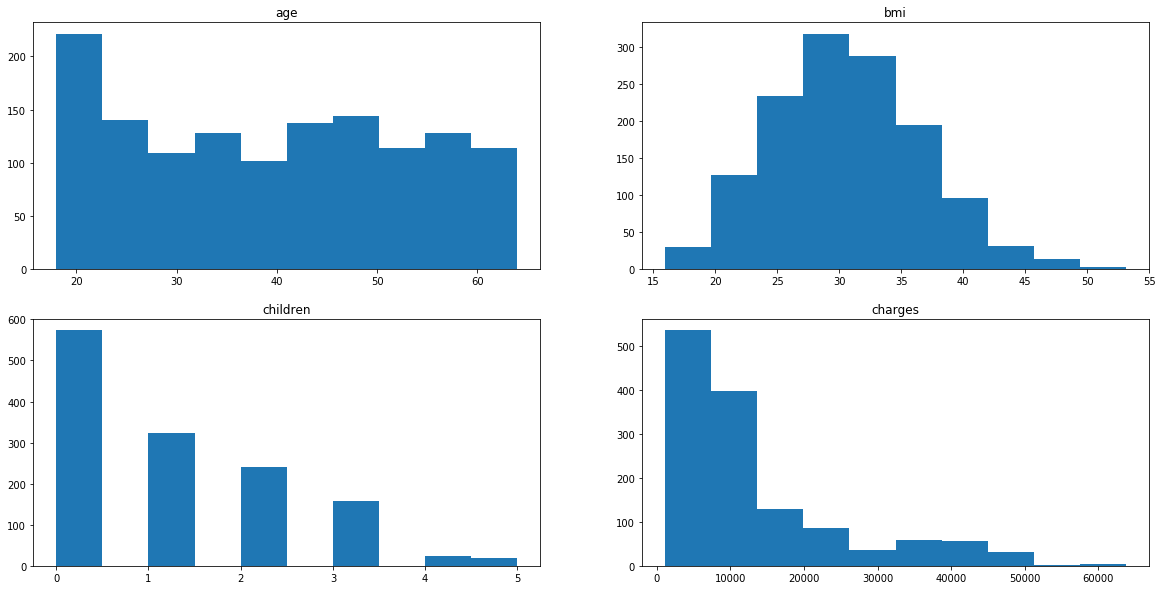

In [69]:
#sürekli değişkenlerin dağılımına bakalım.
columns=['age','bmi','children','charges']
plt.figure(figsize=(20,10))

for i,j in zip(columns, range(1,5)):
        plt.subplot(2,2,j)
        plt.hist(df[i])
        plt.title(i)
plt.show()

Aynı değişkenlerimizin kutu grafiklerine bakalım. Aykırı değer var mı yok mu inceleyelim.

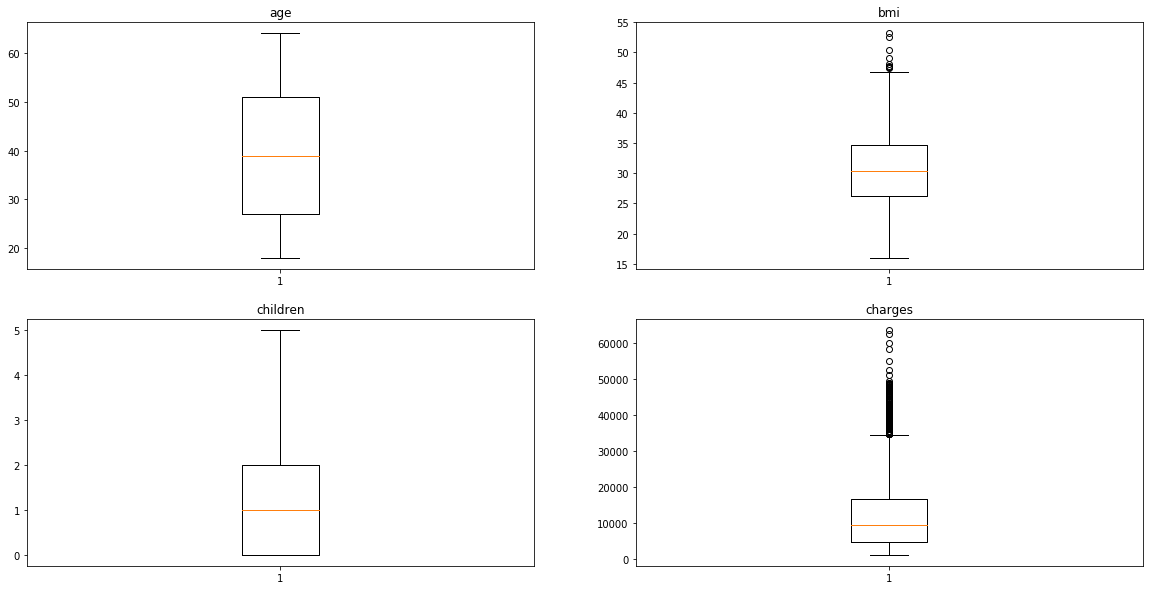

In [70]:
plt.figure(figsize=(20,10))

for i ,j in zip(columns,range(1,5)) :
    plt.subplot(2,2,j)
    plt.boxplot(df[i])
    plt.title(i)
plt.show()

Kutu grafiklerini incelediğimizde **bmi** ve **charges** değişkenleri için aykırı değerler görünüyor. Bu durum oldukça olası. İnsanlar aşırı kilolu olabilir, ameliyat, kaza vb gibi sağlık harcamasını yükselten durumlar yaşamış olabilirler. Bu verilerin analizimizde değerli olduğunu düşündüğümüzden aykırı değerleri bırakarak devam ediyoruz.

#### 4.2 Çok değişkenli Analiz  ve Özellik Mühendisliği

Şimdi de değişkenlerimizin kendi aralarında ve  **hedef** değişkenimiz ile olan ilişkilerini inceleyelim. Sürekli değişkenlerin korelasyon matrislerine bakarak başlıyoruz.

In [71]:
#Sürekli değişkenlerin korelasyon matrisine bakalım.
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


Masraflarla(**charges**) yüksek korelasyonlu olan bir değişken yok. Ancak mevcut tabloya göre bir sıralama yaparsak;
**charges** ile en çok **age** sonra **bmi** değişkenleri korele görünüyor. Diğer değişkenlerin kendi aralarındaki korelasyonları da çok çok düşük olduğundan sürekli değişkenlerin birbirleriyle ilişkilerini ayrıntılı olarak incelemeyeceğiz.

Kategorik değişkenlerle **charges** ilişkisine geçelim. Çubuk grafiklerden faydalanıyoruz burada.  
Aşağıdaki grafiklerde **children** değişkenini de dahil ettik. Sürekli olmasına rağmen sadece 6 farklı ayrık değer aldığından kategorik gibi düşünülebilinir. Her bir çocuk sayısına karşılık da **charges**daki değişimi de görelim.

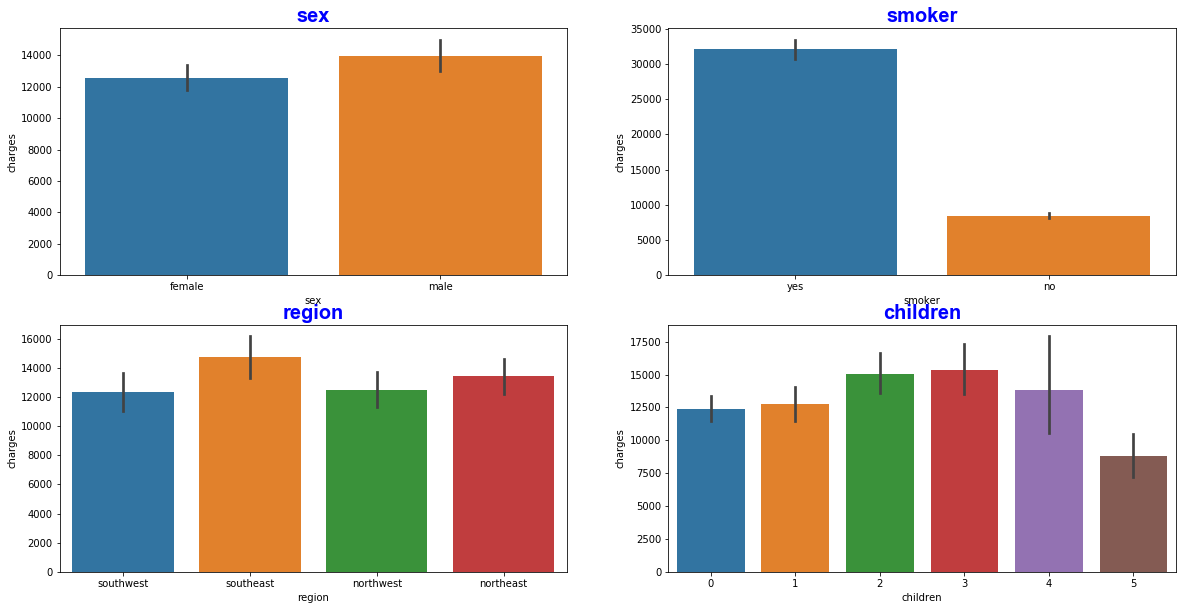

In [72]:
baslik_font = {'family': 'arial', 'color': 'blue','weight': 'bold','size': 20 }
plt.figure(figsize=(20,10))

columns=['sex','smoker','region','children']

for i ,j in zip(columns,range(1,5)) :
    plt.subplot(2,2,j)
    sns.barplot(df[i],df['charges'])
    plt.title(i,fontdict = baslik_font)

plt.show()


Grafiklere bakarak masraflar(**charges**) değişkenin, diğer kolonlardaki verilerin ayrı her bir değerine göre, az ya da çok farklı bir değer aldığı görülüyor. Sadece **region**-**charges**
grafiğinde Southwest ve Northwest arasında gözle görülebilen bir fark yok.  

İlk söylenebilecekler:
* erkek harcamaları kadınlara göre yüksek.
* sigara kullananların harcamaları kullanmayanlara göre oldukça yüksek.
* bölge grafiğinde en yüksek harcama southeast bölgesinde yapılmış.
* çocuk sayısı 3'e kadar harcamaları artırmış görünse de 4 ve 5 çocuk durumunda harcamalar azalmış.  

Aşağıda, tekrar, bu gözlemlenen farkların miktarlarına ve istatistiksel olarak anlamlı olup olmadıklarına bakalım.

##### 4.2.a masraflar ile cinsiyet ilişkisi

Temelde amacımız **hedef** değişkenimizle olan ilişkisini incelemek. Ancak  cinsiyet değişkeninin diğer değişkenlerle olan ilişkisinde dikkate değer bir şey olup olmadığını da görebilmek için onların da ortalamarını tabloya dahil ediyoruz.

In [73]:
#cinsiyet ve masraf ilişkisi
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


Cinsiyete göre **charges** ortalaması değişik değerler almış.Bu değişikliğin istatistiksel olarak anlamlı olup olmadığına t testi aracılığıyla bakalım. Diğer değişkenler cinsiyet değişiminde bariz bir fark görülmüyor.

In [74]:
female= df[df['sex']=='female']['charges']
male = df[df['sex']=='male']['charges']

stats.ttest_ind(female,male)

Ttest_indResult(statistic=-2.124391307062026, pvalue=0.0338207919951195)

Testimizin sonucu 0.05 'ten küçük olduğu için masrafların(**charges**) cinsiyete(**sex**) göre değiştiği ve erkeklerin sağlık harcamalarının daha fazla olduğu yorumunu yapabiliriz.

##### 4.2.b masraflar ile sigara kullanımı ilişkisi

In [75]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


Sigara içip/içmeme durumuna göre **charges** ortalaması değişik değerler almış. Sigara içen müşterilerin çok daha fazla masrafı olduğu açıkça görülüyor. Ama biz yine de istatistiksel olarak olarak bu durumu doğrulayalım. Diğer değişkenlerde sigara kullanımı değişikliğine bağlı bariz bir fark görülmüyor.

In [76]:
smoke_no= df[df['smoker']=='no']['charges']
smoke_yes= df[df['smoker']=='yes']['charges']

stats.ttest_ind(smoke_no,smoke_yes)

Ttest_indResult(statistic=-46.64479459840305, pvalue=1.4067220949376498e-282)

Testimizin sonucu 0.05 'ten küçük olduğu için sigara kullanan müşterilerin  daha fazla harcama yaptığı yorumunu yapabiliriz.

##### 4.2.c masraflar ile bölge ilişkisi

Yukarıda 'Veri Temizliği' kısmında ve grafiklerde görmüştük ama tekrar kaç farklı değer aldığına bakalım.

In [77]:
#Region değişkenimizde kaç farklı değer olduğuna bakalım.
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [78]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.259259,29.195494,1.151235,12450.840844
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Bölgelere göre masraf değişkenin ortalaması  az da olsa farklı değerler almış. Bu farklılıkların istatistiksel olarak anlamlı olup olmadığına t testi aracılığıyla bakalım. Dört farklı bölgeyi tanımlayalım. Burada diğer değişkenlerde görülmeyen bir durum var. **bmi** SE bölgesinde diğer bölgelere göre daha fazla.

In [79]:
region_sw= df[df['region']=='southwest']['charges']
region_se= df[df['region']=='southeast']['charges']
region_nw= df[df['region']=='northwest']['charges']
region_ne= df[df['region']=='northeast']['charges']


Dört farklı bölge altı farklı ikili oluşturuyor. Bu altı durumu da ayrı ayrı değerlendiriyoruz.

In [80]:
print(" SW ve SE arasındaki iliski=",stats.ttest_ind(region_sw,region_se),'\n',
"SW ve NW arasındaki iliski=",stats.ttest_ind(region_sw,region_nw),'\n',
"SW ve NE arasındaki iliski=",stats.ttest_ind(region_sw,region_ne),'\n',
"SE ve Nw arasındaki iliski=",stats.ttest_ind(region_se,region_nw),'\n',
"SE ve NE arasındaki iliski=",stats.ttest_ind(region_se,region_ne),'\n',
"NW ve NE arasındaki iliski=",stats.ttest_ind(region_nw,region_ne))

 SW ve SE arasındaki iliski= Ttest_indResult(statistic=-2.428177355666804, pvalue=0.01543065109569136) 
 SW ve NW arasındaki iliski= Ttest_indResult(statistic=-0.11693588076150004, pvalue=0.9069471528499122) 
 SW ve NE arasındaki iliski= Ttest_indResult(statistic=-1.1829661143927035, pvalue=0.237257081445823) 
 SE ve Nw arasındaki iliski= Ttest_indResult(statistic=2.3571935601351797, pvalue=0.01869363286194638) 
 SE ve NE arasındaki iliski= Ttest_indResult(statistic=1.3631690378016945, pvalue=0.17327647641055313) 
 NW ve NE arasındaki iliski= Ttest_indResult(statistic=-1.0893203629591868, pvalue=0.2764188256203434)


Bölgeler arası t-testlerinin sonuçlarına baktığımızda SW-SE ve SE-NW bölgeleri arasındaki farklar istatistiksel olarak anlamlı. İki testte de SE ortak bölge. Grafiklere geri dönüp baktığımızda en yüksek harcamanın o bölgede olduğu görülüyor.

### 5. Sonuç

Hedef değişkenimiz olan **charges**  ile pozitif korele değişkenler:  
* age
* bmi  

Tekrar hatırlatalım. Bu korelasyon miktarları yüksek değil. Kendi içlerinde birbirlerine kıyasla daha fazla olanları seçtik.  

Hedef değişkenimiz üzerinde etkisi olan kategorik değişkenlerimiz ve harcamaları artırdıkları durumlar:
* smoker- kullanıyor 
* sex   -erkek
* region -southeast  

Bunlar içerisinde en etkili olan **smoker** değişkeni. Bir insanın sigara kullanıyor olması onun sağlık harcamalarını benzer durumlara göre oldukça fazlalaştırıyor.  

'Keşifsel Veri Analizi' sürecinde yapılması gerekli temel işlemleri gerçekleştirdik. İlgili kütüphaneleri yükledik, veriye önbakış yaptık, temizledik, değişkenleri tekli ve çoklu analiz ettik ve nihayetinde _Sağlık Harcamalarını Neler Etkiliyor?_ sorumuza bazı cevaplar almış olduk.  

